# Week 3
    Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [23]:
!pip install seaborn
import seaborn as sns

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = './Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv'
df = pd.read_csv(data)
types = ['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan', 'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation']
print(df)

                hour_beginning         location Pedestrians Towards Manhattan  \
0      2019 Apr 30 12:00:00 AM  Brooklyn Bridge           3                 3   
1      2019 Dec 31 10:00:00 PM  Brooklyn Bridge          10                 9   
2      2019 Dec 31 11:00:00 PM  Brooklyn Bridge           2                 0   
3      2019 Dec 31 09:00:00 PM  Brooklyn Bridge          12                 0   
4      2019 Apr 01 03:00:00 AM  Brooklyn Bridge           1                 0   
...                        ...              ...         ...               ...   
16052  2018 Jun 22 04:00:00 AM  Brooklyn Bridge           7                 4   
16053  2018 Jul 19 06:00:00 AM  Brooklyn Bridge         192                89   
16054  2018 Jun 16 04:00:00 PM  Brooklyn Bridge       2,623             1,161   
16055  2018 Jul 24 06:00:00 PM  Brooklyn Bridge       2,016             1,069   
16056  2018 Jul 23 12:00:00 AM  Brooklyn Bridge          57                20   

      Towards Brooklyn     

{'Monday': 1481435, 'Tuesday': 1394963, 'Wednesday': 1310900, 'Thursday': 1370880, 'Friday': 1588068}


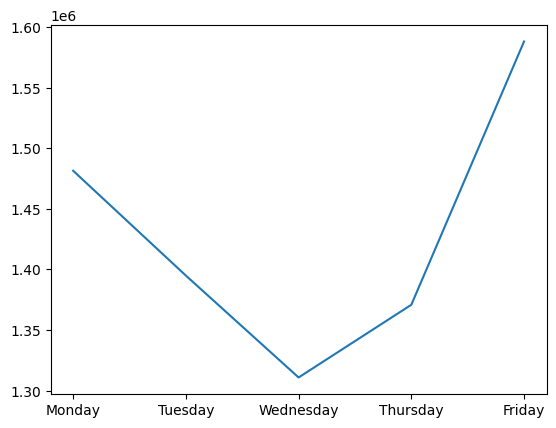

In [3]:
def getDay(time):
    return pd.to_datetime(time).day_name()

weekdays = {
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,
    'Friday': 0,
}

for day,ped in zip(df[types[0]],df[types[2]]):
    cur = getDay(day)
    if cur in weekdays:
        weekdays[cur] += int(ped.replace(',', ''))
print(weekdays)

plt.plot(weekdays.keys(),weekdays.values())


    Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.


In [4]:
def count_unique(iterable):
    counts = {}
    
    for item in iterable:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
            
    return counts

def getYear(year):
    return pd.to_datetime(year).year

#looking through the data you can see the only location is the brooklyn bridge
locations = count_unique(df[types[1]])
weathers = count_unique(df[types[5]])
years = count_unique(df[types[0]].apply(getYear))

'''print(locations)
print(weathers)
print(years)'''

#Cleaned for next step
years = {key: None for key in years}
weathers = {key: None for key in weathers}

weatherPerYear = {}

for year in years:
    weatherPerYear[year] = {}  
    for weather in weathers:
        weatherPerYear[year][weather] = 0

print(weatherPerYear)


{2019: {nan: 0, 'cloudy': 0, 'clear-night': 0, 'clear-day': 0, 'partly-cloudy-night': 0, 'partly-cloudy-day': 0, 'fog': 0, 'rain': 0, 'sleet': 0, 'snow': 0, 'wind': 0}, 2018: {nan: 0, 'cloudy': 0, 'clear-night': 0, 'clear-day': 0, 'partly-cloudy-night': 0, 'partly-cloudy-day': 0, 'fog': 0, 'rain': 0, 'sleet': 0, 'snow': 0, 'wind': 0}, 2017: {nan: 0, 'cloudy': 0, 'clear-night': 0, 'clear-day': 0, 'partly-cloudy-night': 0, 'partly-cloudy-day': 0, 'fog': 0, 'rain': 0, 'sleet': 0, 'snow': 0, 'wind': 0}}


In [5]:
for day,ped,weather in zip(df[types[0]],df[types[2]],df[types[5]]):
    year = int(day.split()[0])
    weatherPerYear[year][weather] += int(ped.replace(',', ''))
print(weatherPerYear)


{2019: {nan: 28, 'cloudy': 984867, 'clear-night': 61815, 'clear-day': 1953025, 'partly-cloudy-night': 63794, 'partly-cloudy-day': 2790868, 'fog': 4673, 'rain': 139502, 'sleet': 1426, 'snow': 8460, 'wind': 2716}, 2018: {nan: 98, 'cloudy': 263904, 'clear-night': 179918, 'clear-day': 1606273, 'partly-cloudy-night': 102405, 'partly-cloudy-day': 1284611, 'fog': 5929, 'rain': 82243, 'sleet': 225, 'snow': 9229, 'wind': 5111}, 2017: {nan: 0, 'cloudy': 38982, 'clear-night': 143855, 'clear-day': 776506, 'partly-cloudy-night': 69247, 'partly-cloudy-day': 431328, 'fog': 7218, 'rain': 13927, 'sleet': 0, 'snow': 490, 'wind': 193}}



Correlation Matrix:


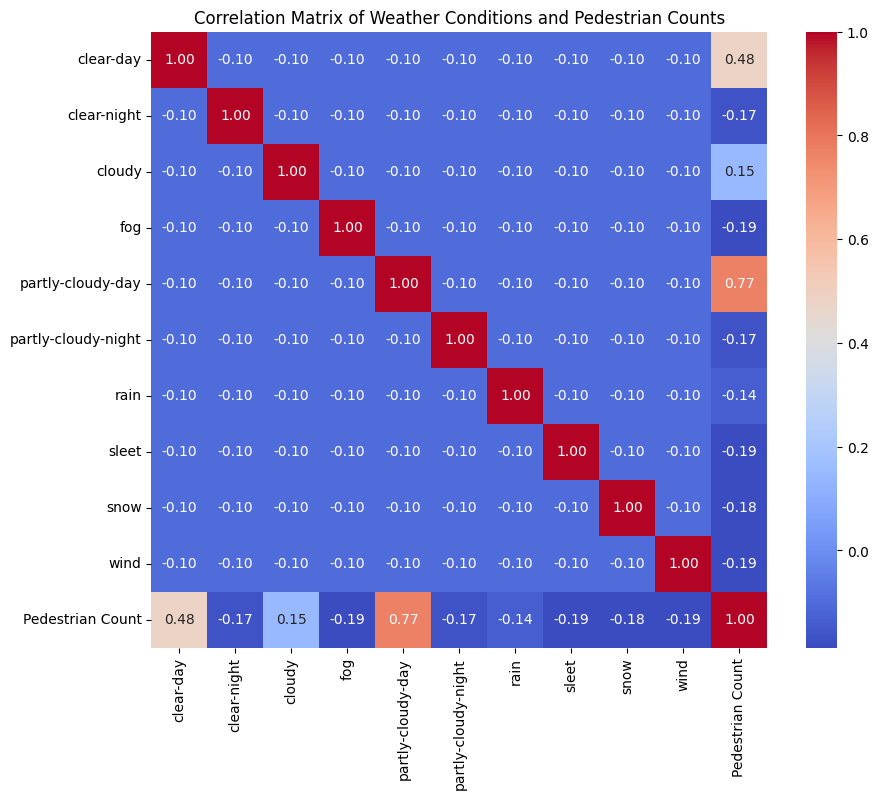


Correlation Matrix:


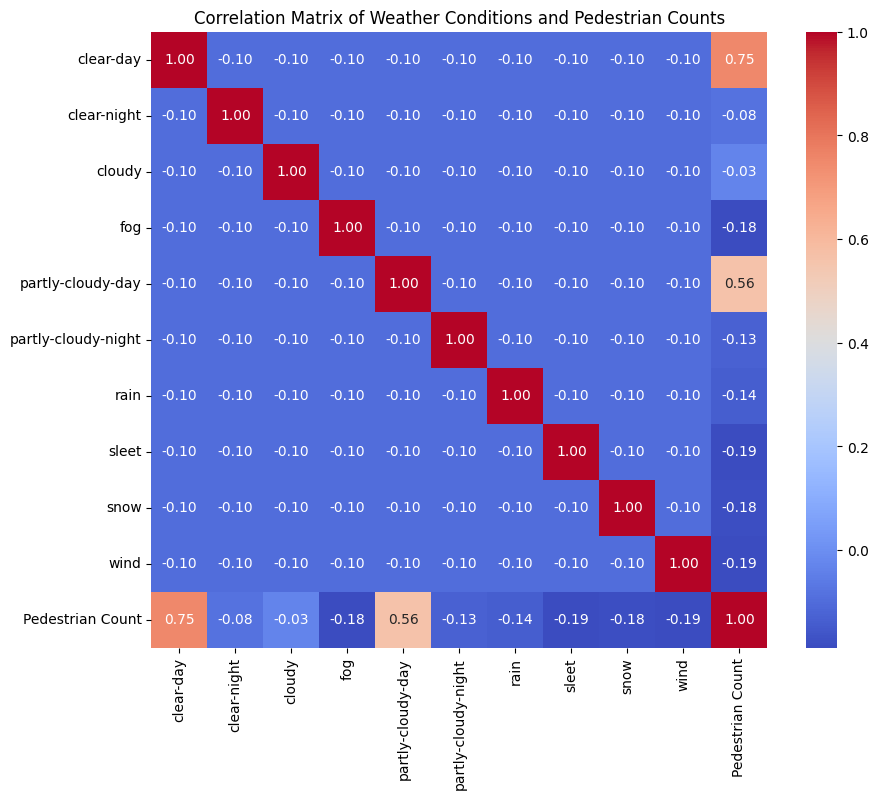

In [28]:
def lookAt(year):
    df2 = pd.DataFrame(list(weatherPerYear[year].items()), columns=['Weather Condition', 'Pedestrian Count'])
    df_sorted = df2.sort_values(by='Pedestrian Count', ascending=False)
    weather_dummies = pd.get_dummies(df_sorted['Weather Condition'])
    df_combined = pd.concat([weather_dummies, df_sorted['Pedestrian Count']], axis=1)
    correlation_matrix = df_combined.corr()
    print("\nCorrelation Matrix:")
    #print(correlation_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Matrix of Weather Conditions and Pedestrian Counts')
    plt.show()

lookAt(2019)
lookingAt = int(input(f'Which year should I look at? \n {list(years)}'))
lookAt(lookingAt)

   Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [61]:
def getTime(time):
    time_part = time.split()[3]  # This gets "09:00:00 PM"
    am_pm = time.split()[4]

    # Further split the time part into components
    hours, minutes, seconds = map(int, time_part.split(':'))

    # Convert to 24-hour format
    if am_pm == "PM" and hours != 12:
        hours += 12
    elif am_pm == "AM" and hours == 12:
        hours = 0
    return hours
    
def whatTimeOfDay(time):
    if time > 21 or time < 5:
        return 'night'
    elif time >= 5 and time < 12:
        return 'morning'
    elif time >= 12 and time < 17:
        return 'afternoon'
    else: 
        return 'evening'
    
#print(getTime(df[types[0]].iloc[2]))
#print(df[types[0]].apply(getTime))
TimeOfDay = df[types[0]].apply(getTime).apply(whatTimeOfDay)
df['TimeOfDay'] = TimeOfDay
df.to_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv', index=False)  # Use the original file name to overwrite

In [ ]:
print(df['TimeOfDay'])

0            night
1            night
2            night
3          evening
4            night
           ...    
16052        night
16053      morning
16054    afternoon
16055      evening
16056        night
Name: TimeOfDay, Length: 16057, dtype: object
